# Análisis de comportamiento de compra en Instacart

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
* [Etapa 2. Preprocesamiento de datos](#data_preprocess)
    * [2.1 Corrección en el tipo de datos](#data_correct)
        * [2.1.1. Corrección al dataframe df_instacart](#data_correct_insta)
        * [2.1.2. Corrección al dataframe df_products](#data_correct_prod)
    * [2.2 Valores ausentes](#data_missing)
        * [2.2.1. Valores ausentes en df_instacart](#data_miss_insta)
        * [2.2.2. Valores ausentes en df_products](#data_miss_prod)
        * [2.2.3. Valores ausentes en df_orders](#data_miss_ord)
    * [2.3 Valores duplicados](#data_dup)
        * [2.3.1. Duplicados en df_instacart](#data_dup_insta)
        * [2.3.2. Duplicados en df_products](#data_dup_prod)
        * [2.3.3. Duplicados en df_departments](#data_dup_dep)
        * [2.3.4. Duplicados en df_aisles](#data_dup_ais)
        * [2.3.5. Duplicados en df_orders](#data_dup_ord)
    * [2.4 Observaciones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis de los datos](#data_analysis)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos presentó modificaciones del original, ya que se introdujeron valores ausentes y duplicados por error del sistema.

Hay cinco tablas en el conjunto de datos que se utilizarán para hacer el preprocesamiento de datos y el análisis exploratorio. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contiene.

## Diccionario de datos

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Etapa 1. Descripción de los datos <a id='data_review'></a>

Lo primero será importar `pandas` para poder leer los archivos CSV. Una vez leamos los archivos, revisaremos si la importación de los datos se realizó correctamente o si requerimos ajustes como cambiar el parámetro que detecta los separadores del CSV.

Adicionalmente, importaremos `numpy` y `matplotlib.pyplot` para realizar operaciones matemáticas y graficar los resultados de nuestro análisis.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv('/datasets/instacart_orders.csv')
df_products = pd.read_csv('/datasets/products.csv')
df_orders = pd.read_csv('/datasets/order_products.csv')
df_aisles = pd.read_csv('/datasets/aisles.csv')
df_departments = pd.read_csv('/datasets/departments.csv')

In [3]:
# mostrar información del DataFrame df_instacart
df_instacart.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [4]:
# mostrar información del DataFrame df_products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB


In [5]:
# mostrar información del DataFrame df_orders
df_orders.info(show_counts=True) # Usamos show_counts en True para mostrar el conteo de datos no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Non-Null Count    Dtype 
---  ------                                           --------------    ----- 
 0   order_id;product_id;add_to_cart_order;reordered  4545007 non-null  object
dtypes: object(1)
memory usage: 34.7+ MB


In [6]:
# mostrar información del DataFrame df_aisles
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [7]:
# mostrar información del DataFrame df_departments
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


Observando la información de cada dataframe notamos que los separadores que usan son el punto y coma (;) por tanto, reimportaremos usando dicho separador y volveremos a analizar la información.

In [8]:
# volver a leer conjuntos de datos en los DataFrames con el separador correcto
df_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_orders = pd.read_csv('/datasets/order_products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [9]:
# mostrar información del DataFrame df_instacart
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [10]:
# mostrar las primeras filas del dataframe df_instacart
df_instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [11]:
# mostrar información del DataFrame df_products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
# mostrar las primeras filas del dataframe df_products
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
# mostrar información del DataFrame df_orders
df_orders.info(show_counts=True) # Usamos show_counts en True para mostrar el conteo de datos no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [14]:
# mostrar las primeras filas del dataframe df_orders
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [15]:
# mostrar información del DataFrame df_aisles
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [16]:
# mostrar las primeras filas del dataframe df_aisles
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
# mostrar información del DataFrame df_departments
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [18]:
# mostrar las primeras filas del dataframe df_departments
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Ahora podemos observar las primeras características de los datos, en donde concluimos que tendremos que hacer algunos pre procesos antes de iniciar los análisis:

- Los dataframes 'df_instacart', 'df_products' y 'df_orders' tienen columnas con valores nulos que deberemos tratar.
- Algunas columnas están manejando tipos de datos incorrectos, como es el caso de 'days_since_prior_order' en el dataframe 'df_instacart' y 'add_to_cart_order' en el dataframe 'df_orders'.

# Etapa 2. Preprocesamiento de los datos <a id='data_preprocess'></a>

El preprocesamiento de los datos se aproximará de la siguiente manera:

- Se verificará y corregirá los tipos de datos.
- Se identificarán y completarán los valores ausentes.
- Se identificarán y eliminarán los valores duplicados.

### 2.1. Corrección en el tipo de datos. <a id='data_correct'></a>

#### 2.1.1. Corrección al dataframe df_instacart. <a id='data_correct_insta'></a>

Iniciaremos corrigiendo 'days_since_prior_order' en el dataframe 'df_instacart' del tipo float al tipo int.

In [19]:
# Revisamos que no hallan valores inusuales o que varien al cambiar el tipo.
df_instacart['days_since_prior_order'].unique()

array([30.,  9.,  2., 10., 17., 15., 22.,  4.,  8.,  3., 12., 11.,  7.,
        1.,  5.,  6., 14., nan, 20., 16., 24., 23., 27., 13.,  0., 28.,
       21., 25., 19., 18., 29., 26.])

El único valor inusual es `nan` que nos muestra que hay valores ausentes; posteriormente trataremos con estos.

In [20]:
# Realizamos el cambio de tipo a 'Int64' sobre una nueva columna y revisamos que los valores sean coherentes.
df_instacart['days_since_prior_order_new'] = df_instacart["days_since_prior_order"].astype('Int64')
df_instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_since_prior_order_new
0,1515936,183418,11,6,13,30.0,30
1,1690866,163593,5,5,12,9.0,9
2,1454967,39980,4,5,19,2.0,2
3,1768857,82516,56,0,20,10.0,10
4,3007858,196724,2,4,12,17.0,17


Podemos ver en las primeras filas que el cambio de tipo se realizó; sin embargo, debemos asegurarnos de que ningún valor sea diferente al original. Para ello, compararemos los valores originales con los nuevos y traeremos con un filtro aquellos valores que sean diferentes.

In [21]:
# Nos aseguramos que ningun valor en el cambio de tipo halla sido afectado o sea diferente al original.
df_instacart[df_instacart['days_since_prior_order_new'] != df_instacart['days_since_prior_order']]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_since_prior_order_new


Al tener como resultado un dataframe vacío, nos hemos asegurado de que los valores no han sufrido ningún cambio; ahora reemplazaremos los valores antiguos por los nuevos y nos desharemos de la columna que creamos.

In [22]:
# Hacemos la reasignación de valores con el tipo de datos correcto y eliminamos la columna 'days_since_prior_order_new'.
df_instacart['days_since_prior_order'] = df_instacart['days_since_prior_order_new']
df_instacart.drop(labels='days_since_prior_order_new' , axis=1, inplace=True)
df_instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17


In [23]:
# Confirmamos que el nuevo tipo de la columna es int.
df_instacart['days_since_prior_order'].dtype

Int64Dtype()

#### 2.1.2. Correción al dataframe df_orders. <a id='data_correct_prod'></a>

Vamos a recorrer los mismos pasos del numeral anterior, ya que la conversión también se trata de un tipo float a int con presencia de valores ausentes, como observamos en la lectura de los datos. Recordemos que la columna que trataremos es 'add_to_cart_order'.

In [24]:
# Revisamos que no hallan valores inusuales o que varien al cambiar el tipo.
df_orders['add_to_cart_order'].unique()

array([17.,  1., 35.,  5.,  4., 10., 14.,  2., 28.,  3., 16.,  8.,  7.,
        6.,  9., 15., 22., 49., 19., 13., 11., 12., 18., 24., 23., 45.,
       30., 31., 29., 21., 38., 20., 57., 58., 26., 25., 39., 34., 40.,
       27., nan, 43., 33., 42., 50., 32., 36., 37., 61., 46., 56., 41.,
       44., 55., 54., 47., 63., 48., 60., 62., 53., 59., 52., 51., 64.])

In [25]:
# Realizamos el cambio de tipo a 'Int64' sobre una nueva columna y revisamos que los valores sean coherentes.
df_orders['add_to_cart_order_new'] = df_orders['add_to_cart_order'].astype('Int64')
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered,add_to_cart_order_new
0,2141543,11440,17.0,0,17
1,567889,1560,1.0,1,1
2,2261212,26683,1.0,1,1
3,491251,8670,35.0,1,35
4,2571142,1940,5.0,1,5


In [26]:
# Nos aseguramos que ningun valor en el cambio de tipo halla sido afectado o sea diferente al original.
df_orders[df_orders['add_to_cart_order_new'] != df_orders['add_to_cart_order']]

,order_id,product_id,add_to_cart_order,reordered,add_to_cart_order_new


In [27]:
# Hacemos la reasignación de valores con el tipo de datos correcto y eliminamos la columna 'add_to_cart_order_new'.
df_orders['add_to_cart_order'] = df_orders['add_to_cart_order_new']
df_orders.drop(labels='add_to_cart_order_new' , axis=1, inplace=True)
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [28]:
# Confirmamos que el nuevo tipo de la columna es int.
df_orders['add_to_cart_order'].dtype

Int64Dtype()

### 2.2. Valores ausentes. <a id='data_missing'></a>

#### 2.2.1. Valores ausentes en df_instacart. <a id='data_miss_insta'></a>

El dataframe 'df_instacart' tiene una columna con valores ausentes (days_since_prior_order); echemos un vistazo más profundo a dicha columna:

In [29]:
# Observamos los valores descriptivos de la columna para obtener más información.
df_instacart['days_since_prior_order'].describe()

count    450148.000000
mean         11.101751
std           9.189975
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

Parece que cuenta con información coherente, como por ejemplo su valor mínimo, que es 0, implicando que no han pasado días entre el último pedido del cliente y también hay un máximo de 30 días para esta columna. Exploremos los valores ausentes en el dataframe:

In [30]:
# Filtramos unicamente las filas con valores ausentes de este dataframe.
df_instacart_nulls = df_instacart[df_instacart['days_since_prior_order'].isna()]
df_instacart_nulls

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,<NA>
96,787445,25685,1,6,18,<NA>
100,294410,111449,1,0,19,<NA>
103,2869915,123958,1,4,16,<NA>
104,2521921,42286,1,3,18,<NA>
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,<NA>
478896,2222353,141211,1,2,13,<NA>
478922,2272807,204154,1,1,15,<NA>
478926,2499542,68810,1,4,19,<NA>


Parece ser que a simple vista podemos detectar un patrón en la columna 'order_number' de todas las filas con valores nulos y es que se trata de las primeras órdenes de cada cliente. Es muy probable que esa sea la razón de que la columna 'days_since_prior_order' tenga valores nulos. Confirmemos la hipótesis mirando todos los valores de 'order_number' en el dataframe de valores nulos.

In [31]:
# Revisamos cuantos valores existen en 'order_number' para el dataframe de valores nulos.
df_instacart_nulls['order_number'].unique()

array([1])

¡Hemos confirmado nuestra hipótesis!

Esto significa que lo mejor es dejar estos datos como nulos, ya que si los reemplazamos por 0, podríamos brindar información incorrecta debido a que hay un significado para valores 0 en esta columna (pedidos realizados el mismo día que el pedido anterior). Además, si reemplazamos por 0 este valor, también podríamos afectar los valores de tendencia central y otras estadísticas con información incorrecta.

Al mantener los valores nulos hemos realizado una gestión de los mismos.

#### 2.2.2. Valores ausentes en df_products. <a id='data_miss_prod'></a>

El dataframe 'df_products' tiene una columna con valores ausentes (product_name); echemos un vistazo más profundo a dicha columna:

In [32]:
# Observamos los valores descriptivos de la columna para obtener más información.
df_products['product_name'].describe()

count                                        48436
unique                                       48436
top       Smart Start Original Antioxidants Cereal
freq                                             1
Name: product_name, dtype: object

Por ahora no hay información relevante que nos dé pista alguna de los valores nulos. Veamos si en un dataframe solo de los valores nulos podemos observar algún patrón.

In [33]:
# Filtramos unicamente las filas con valores ausentes de este dataframe.
df_products_nulls = df_products[df_products['product_name'].isna()]
df_products_nulls

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Aquí sí podemos observar un patrón claro, al parecer, todos los valores nulos corresponden al aisle_id = 100 y al department_id = 21. Confirmemos nuevamente esta hipótesis y exploremos en los data frames df_aissles y df_products a qué corresponden dichos ids.

In [34]:
# Confirmemos la hipotesis anterior.
print(df_products_nulls['aisle_id'].unique())
print(df_products_nulls['department_id'].unique())

[100]
[21]


Hemos confirmado que solo existen dichos valores en los valores nulos, ahora investiguemos a qué aisle y department corresponden.

In [35]:
# Mostramos el aisle de id 100.
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [36]:
# Mostramos el department de id 21.
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


Al parecer corresponden a la categoría missing en ambos campos. Como última exploración revisemos si las órdenes de dichos productos nos pueden dar más información.

In [37]:
# Filtrando el dataframe de ordenes por todos aquellos ids de productos que se encuentren en el dataframe de valores nulos.
df_orders.query("product_id in @df_products_nulls['product_id']")

,order_id,product_id,add_to_cart_order,reordered
294,3021784,7035,8,0
927,2666296,30563,17,0
1182,305489,39414,17,0
2488,1024440,27767,7,1
2878,1395530,10319,8,0
...,...,...,...,...
4541011,1658209,10690,13,0
4543090,968372,12421,15,0
4543177,61885,35918,2,0
4543751,102783,9659,5,0


Al parecer, todos estos productos son órdenes reales y con información relevante, por lo que no podemos descartarlos. La mejor solución es reasignar estos productos con el nombre 'missing', tal y como sucedía con el aisle y el department, de esta forma informamos que no tenemos los datos del nombre y mantenemos aun el resto de información de sus rows, la cual es relevante.

In [38]:
# Reemplazando los valores ausentes por 'missing' y comprobando que ya no hay valores ausentes.
df_products['product_name'].fillna('missing', inplace=True)
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### 2.2.3. Valores ausentes en df_orders. <a id='data_miss_ord'></a>

El dataframe 'df_orders' tiene una columna con valores ausentes (add_to_cart_order), echemos un vistazo más profundo a dicha columna:

In [39]:
# Observamos los valores descriptivos de la columna para obtener más información.
df_orders['add_to_cart_order'].describe()

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

De la descripción podemos observar que el valor mínimo de la columna es 1. Esto tiene sentido, ya que esta columna nos indica la ordenación en la que los productos de una orden se agregaron al carrito y ordinalmente 1 es el valor más bajo que podemos tener, significando que ese elemento fue el primero de la lista del carrito.

También podemos ver que el valor máximo de la columna es 64. Indaguemos un poco más en las columnas con valores nulos...

In [40]:
# Filtramos unicamente las filas con valores ausentes de este dataframe.
df_orders_nulls = df_orders[df_orders['add_to_cart_order'].isna()]
df_orders_nulls

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


Al momento la tabla no nos muestra algo relevante para plantear una hipótesis. ¿Qué pasa si analizamos todos los productos de cada order_id en la tabla de valores nulos?

In [41]:
# Revisando los ids de las ordenes con valores nulos en la tabla de ordenes.
orders_with_nulls = df_orders.query("order_id in @df_orders_nulls['order_id']")

# La revision se ordena por 'order id' para analizar las ordenes mas facilmente.
orders_with_nulls.sort_values('order_id')

,order_id,product_id,add_to_cart_order,reordered
4414174,9310,37838,35,0
3680648,9310,47209,24,0
4342158,9310,35782,9,1
4432234,9310,21332,64,0
3318138,9310,16290,32,0
...,...,...,...,...
245717,3383594,5315,29,0
3741871,3383594,11616,41,0
869133,3383594,35921,39,0
2875349,3383594,16975,14,0


In [42]:
# Relizamos otra exploracion ordenando simultanemaente por order id y add to cart order.
sorted_order_nulls = orders_with_nulls.sort_values(['order_id', 'add_to_cart_order'])
sorted_order_nulls

,order_id,product_id,add_to_cart_order,reordered
4520124,9310,32578,1,1
2160215,9310,20082,2,1
3148360,9310,27966,3,1
1806792,9310,18523,4,1
990652,9310,42828,5,0
...,...,...,...,...
1038616,3383594,15424,<NA>,1
1537276,3383594,15076,<NA>,0
2772397,3383594,46710,<NA>,0
3760909,3383594,63,<NA>,0


In [43]:
# Revisamos a profundidad la primera orden de nuestro filtro.
sorted_order_nulls[sorted_order_nulls['order_id'] == 18782]

,order_id,product_id,add_to_cart_order,reordered


In [44]:
# Exploramos tambien la ultima para poder lanzar una hipostesis.
sorted_order_nulls[sorted_order_nulls['order_id'] == 3383594]

,order_id,product_id,add_to_cart_order,reordered
2531790,3383594,19645,1,0
1880235,3383594,2525,2,0
1640026,3383594,25146,3,1
2124274,3383594,48697,4,0
2992211,3383594,27360,5,1
...,...,...,...,...
1038616,3383594,15424,<NA>,1
1537276,3383594,15076,<NA>,0
2772397,3383594,46710,<NA>,0
3760909,3383594,63,<NA>,0


Al parecer hemos hallado algo interesante al organizar los datos por order id y por add to cart order, podemos observar que a partir del elemento 64 añadido al carrito iniciamos a tener valores nulos en nuestros datos. Esto puede deberse ya sea a un error o a una limitación de la máquina o el código que registra las adiciones al carrito. Podemos solucionarlo fácilmente al agregar aleatoriamente los números restantes de los elementos en cada pedido, pero primero confirmemos que nuestra hipótesis es verdadera asegurándonos de que no hay valores mayores a 64 en los datos.

In [45]:
# Verificando la hipotesis para cada orden con valores nulos.
orders_with_nulls.groupby('order_id')['add_to_cart_order'].max()

order_id
9310       64
61355      64
102236     64
129627     64
165801     64
           ..
2999801    64
3125735    64
3308010    64
3347453    64
3383594    64
Name: add_to_cart_order, Length: 70, dtype: Int64

Hemos confirmado nuestra hipótesis; ahora corregimos este problema haciendo uso de funciones y bucles.

In [46]:
# Funcion para reemplazar los valores nulos en cada numero de orden.
def complete_cart_orders(order):
    filtered_df = df_orders[df_orders['order_id'] == order] #Filtramos los valores por numero de orden.
    new_vals = np.arange(65, len(filtered_df)+1) # Generamos una lista con los valores faltantes usando la longuitud del df filtrado.
    df_orders.loc[(df_orders['order_id'] == order) & (df_orders['add_to_cart_order'].isna()), 'add_to_cart_order'] = new_vals # Reemplazamos los valores en nuestro dataframe.

In [47]:
# Usamos la funcion en cada orden con valores nulos.
for order in orders_with_nulls['order_id'].unique():
    complete_cart_orders(order)

In [48]:
# Verificamos la existencia de valores nulos nuevamente.
df_orders['add_to_cart_order'].isna().sum()

0

Hemos completado nuestra hazaña de gestionar nuestros datos ausentes, para terminar, observemos la lista de una de las órdenes que tenía valores ausentes para confirmar que la información sea coherente.

In [49]:
# Verificamos una orden que poseia valores nulos para corroborar como fue su relleno de datos. 
df_orders[df_orders['order_id'] == 2094761].sort_values('add_to_cart_order')

,order_id,product_id,add_to_cart_order,reordered
1498989,2094761,22122,1,1
2053743,2094761,24852,2,1
2848403,2094761,5114,3,1
2923329,2094761,11009,4,1
650429,2094761,3055,5,1
...,...,...,...,...
1420876,2094761,47862,69,0
1967051,2094761,1099,70,0
2175085,2094761,49227,71,0
2846497,2094761,5112,72,1


## 2.3. Valores duplicados. <a id='data_dup'></a>

### 2.3.1. Valores duplicados en df_instacart. <a id='data_dup_insta'></a>

Vamos a continuar con la limpieza revisando si hay duplicados en los dataframes. Iniciemos con revisar el df_instacart.

In [50]:
# Revisa si hay pedidos duplicados
df_instacart[df_instacart.duplicated(keep=False)].sort_values('order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10
371905,391768,57671,19,3,2,10
119251,408114,68324,4,3,2,18
321100,408114,68324,4,3,2,18
394347,467134,63189,21,3,2,2
250626,467134,63189,21,3,2,2
99462,794638,50898,24,3,2,2
145574,794638,50898,24,3,2,2
311713,1021560,53767,3,3,2,9
242618,1021560,53767,3,3,2,9


In [52]:
# Elimina los pedidos duplicados
df_instacart.drop_duplicates(inplace=True)

In [53]:
# Vuelve a verificar si hay filas duplicadas
df_instacart[df_instacart.duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [54]:
# Vuelve a verificar si hay IDs duplicados de pedidos
df_instacart[df_instacart['order_id'].duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Encontramos que existían algunos valores duplicados explícitos en nuestro dataframe, indagamos un poco alrededor de algunos patrones que observamos, pero no encontramos un problema mayor asociado a él, por tanto decidimos remover estos duplicados y continuar con nuestra limpieza.

### 2.3.2. Valores duplicados en df_products. <a id='data_dup_prod'></a>

In [57]:
# Verifica si hay filas totalmente duplicadas
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [58]:
# Verifica si hay IDs duplicadas de productos
df_products[df_products['product_id'].duplicated()]

,product_id,product_name,aisle_id,department_id


In [ ]:
# Verifica si hay nombres duplicados de productos 
# Se convierte los nombres a letras minúsculas para compararlos mejor
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name']

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

In [ ]:
# Verifica si hay nombres duplicados de productos diferentes a 'missing'
df_products[(df_products['product_name'].duplicated(keep=False)) & (df_products['product_name'] != 'missing')].sort_values('product_name')

,product_id,product_name,aisle_id,department_id
23339,23340,18-in-1 hemp peppermint pure-castile soap,25,11
31844,31845,18-in-1 hemp peppermint pure-castile soap,25,11
19941,19942,aged balsamic vinegar of modena,19,13
13152,13153,aged balsamic vinegar of modena,19,13
24830,24831,albacore solid white tuna in water,95,15
...,...,...,...,...
46873,46874,vitamin d3 5000 iu,47,11
21366,21367,wild sardines in spring water,95,15
40093,40094,wild sardines in spring water,95,15
1826,1827,yams cut sweet potatoes in syrup,81,15


A pesar de haber encontrado algunos 'product_names' idénticos bajo el mismo pasillo ('aisle_id') y en el mismo departamento ('department-id'), mantienen diferentes 'product_id', lo que nos puede dar a entender que se pueden tratar de productos con alguna diferencia (marca, volumen, cantidad, etc.). Requeriríamos más información para determinar si son duplicados reales o no. Por esto mantendremos estos valores en nuestro dataframe.

### 2.3.3. Valores duplicados en df_departments. <a id='data_dup_dep'></a>

In [61]:
# Revisa si hay filas totalmente duplicadas
df_departments[df_departments.duplicated()]

,department_id,department


In [62]:
# Revisa si hay IDs duplicadas de productos
df_departments[df_departments['department_id'].duplicated()]

,department_id,department


No tenemos duplicados de ningún tipo en este dataframe.

### 2.3.4. Valores duplicados en df_aisles. <a id='data_dup_ais'></a>

In [63]:
# Revisa si hay filas totalmente duplicadas
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [64]:
# Revisa si hay IDs duplicadas de productos
df_aisles[df_aisles['aisle_id'].duplicated()]

,aisle_id,aisle


No tenemos duplicados de ningún tipo en este dataframe.

### 2.3.5. Valores duplicados en df_orders. <a id='data_dup_ord'></a>

In [65]:
# Revisa si hay filas totalmente duplicadas
df_orders[df_orders.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [66]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_orders[df_orders.duplicated(subset=['order_id', 'product_id'], keep=False)].sort_values('order_id')

,order_id,product_id,add_to_cart_order,reordered


En este dataframe es normal tener valores repetidos en la columna 'order_id', ya que representan los diferentes productos pedidos en una misma orden, cada uno en una fila diferente. Algo que no es común tal vez es tener un mismo producto dos veces en una misma orden, sin embargo, no presentamos esos casos en nuestro dataframe, por lo que estamos seguros de que ya no presentamos duplicados en nuestro dataframe.

## Observaciones <a id='data_preprocessing_conclusions'></a>

Hemos completado el preprocesamiento y la limpieza de los datos. Encontramos algunos patrones que nos dieron pistas para tomar decisiones, en otros casos determinamos que requeríamos más información para tomar otras decisiones, así que optamos por no modificar dichos datos. Aun así, estamos listos para trabajar con nuestros datos y obtener más información de ellos en nuestro análisis.

# Etapa 3. Análisis de los datos. <a id='data_analysis'></a>

Tenemos una serie de preguntas del departamento de marketing que nos gustaría responder con nuestros datos, para ello realizaremos un análisis exploratorio de los mismos.

### 3.1. ¿Los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders son razonables? (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).

In [67]:
# Verificando los valores de las columnas 'order_hour_of_day'
sorted(df_instacart['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [68]:
# Verificando los valores de las columnas 'order_dow'
sorted(df_instacart['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

Los valores para estas dos columnas son coherentes y razonables, como observamos.

### 3.2. Se requieré un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

Para la visualización de las gráficas lo realizaremos en base a un muestreo del 75% de los valores para facilitar la ejecución de gráficos en la memoria RAM.

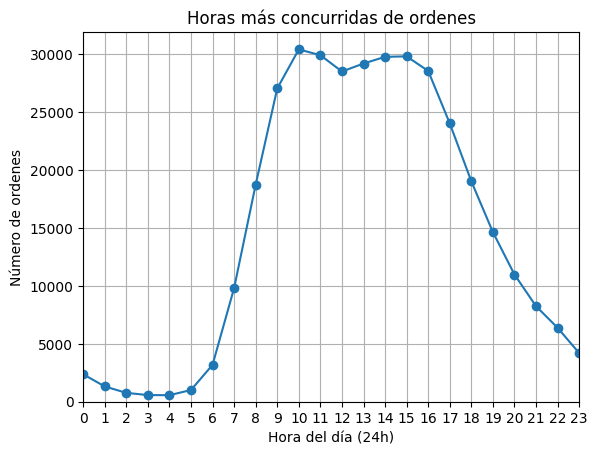

In [ ]:
# Visualización del numero de ordenes por día.
df_sample = df_instacart.sample(int(len(df_instacart)*0.75), random_state=10) # Obtenemos la muestra del 75% de los datos.
df_hour_of_day = df_sample.groupby('order_hour_of_day')['order_hour_of_day'].count() # Agrupamos los datos por la hora del día.
hour_plot = df_hour_of_day.plot(title='Horas más concurridas de ordenes',
                                xlabel='Hora del día (24h)',
                                ylabel='Número de ordenes',
                                xlim=[0,23],
                                ylim=0,
                                marker='o') # Graficamos el conteo de los valores agrupados en un diagrama de lineas.
hour_plot.set_xticks(range(0, 24)) # Acomodamos los valores del eje x para que visualizemos todos los valores
plt.grid() # Añadimos una cuadricula para hacer la visualización mas sencilla.
plt.show()

La visualización de horas más concurridas de órdenes nos muestra cómo a partir de las 7 de la mañana se disparan los pedidos, alcanzan un máximo entre las 10 am y las 4 pm y a partir de esa hora inician a descender paulatinamente. Concluyendo, entre 10 am y 4 pm se tiene la mayor cantidad de órdenes en un día.

### 3.3. Se requiere un gráfico que muestre qué día de la semana la gente hace sus compras.

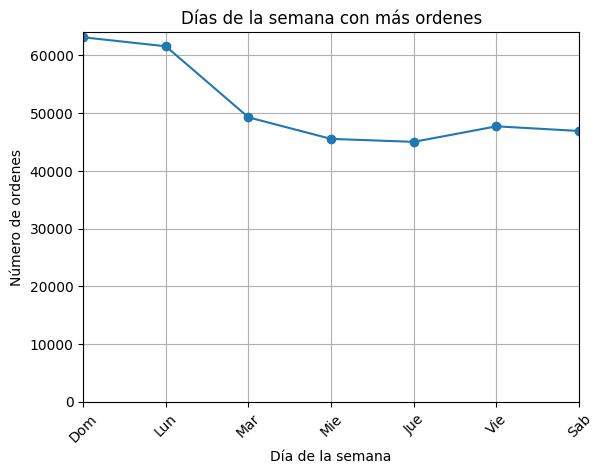

In [70]:
# Visualización del numero de ordenes por día de la semana.
df_day = df_sample.groupby('order_dow')['order_dow'].count() # Agrupamos los datos por la día de la semana.
day_plot = df_day.plot(title='Días de la semana con más ordenes',
                                xlabel='Día de la semana',
                                ylabel='Número de ordenes',
                                xlim=[0, 6],
                                ylim=0,
                                marker='o',
                                rot=45) # Graficamos el conteo de los valores agrupados en un diagrama de lineas.
plt.xticks(ticks=range(0,7),labels=['Dom', 'Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab']) # Reajuste en las etiquetas del eje.
plt.grid() # Añadimos una cuadricula para hacer la visualización mas sencilla.
plt.show()

Gracias a las visualizaciones podemos concluir que los dos días con más órdenes son el domingo y el lunes; el resto de días de la semana las órdenes disminuyen y se mantienen en un rango muy similar.

### 3.4. Se requiere un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido.

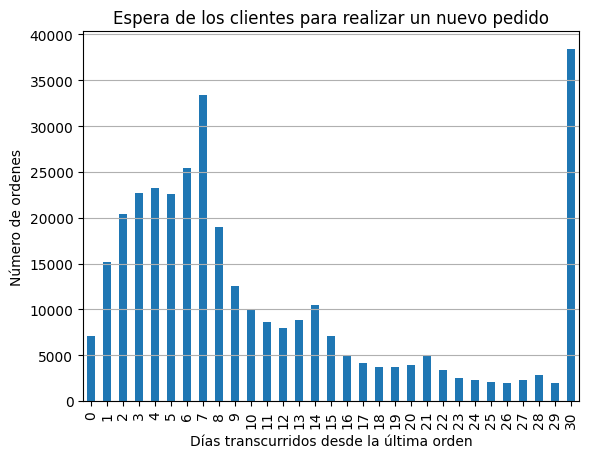

In [71]:
# Visualización del tiempo de espera entre ordenes.
df_last_order = df_sample.groupby('days_since_prior_order')['days_since_prior_order'].count() # Agrupamos los datos por la día de la semana.
last_order_plot = df_last_order.plot(title='Espera de los clientes para realizar un nuevo pedido',
                                xlabel='Días transcurridos desde la última orden',
                                ylabel='Número de ordenes',
                                kind='bar',
                                ylim=0) # Graficamos el conteo de los valores agrupados en un diagrama de lineas.
plt.grid(axis='y') # Añadimos una cuadricula para hacer la visualización mas sencilla.
plt.show()

In [ ]:
# Cuales son los valores minimos y maximos?
df_sorted = df_last_order.sort_values()
min_val = df_sorted[df_sorted == df_sorted.min()]
print(f'{min_val.iloc[0]} es el número de clientes que espera {min_val.index[0]} días para realizar su próximo pedido. Este es el número de días de espera menos frecuente.')

max_val = df_sorted[df_sorted == df_sorted.max()]
print(f'{max_val.iloc[0]} es el número de clientes que espera {max_val.index[0]} días para realizar su próximo pedido. Este es el número de días de espera más frecuente.')

1957 es el numero de clientes que espera 26 días para realizar su proximo pedido. Este es el numero de días de espera menos frecuente.
38417 es el numero de clientes que espera 30 días para realizar su proximo pedido. Este es el numero de días de espera más frecuente.


Podemos concluir que un gran grupo de clientes espera de entre 1 a 8 días para realizar su próximo pedido, sin embargo, el valor más frecuente se halla en la franja de 30 días. Observando los valores previos y que este es el valor máximo de los datos, podemos concluir también que este grupo no se refiere a clientes que esperan específicamente 30 días, es más bien el grupo de clientes que espera 30 o más días para realizar su próxima compra. Esta interpretación tendría más sentido en nuestro conjunto de datos, sin embargo, requiere una validación con el personal de recolección de datos para confirmar que esta interpretación es correcta.

### 3.5. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados?

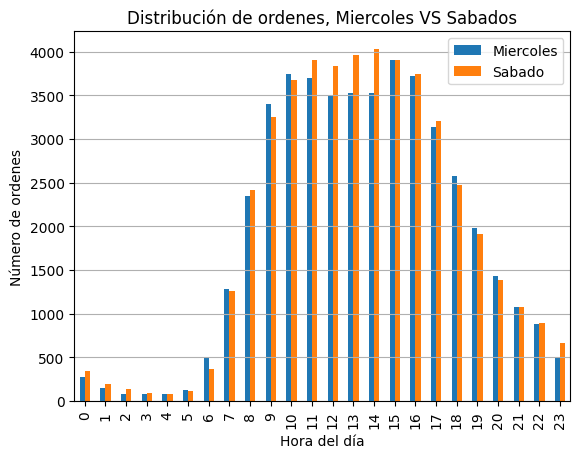

In [ ]:
# Visualización de la diferencia entre las distribuciones 'order_hour_of_day'.
df_day_of_order = df_sample[(df_sample['order_dow'] == 3) | (df_sample['order_dow'] == 6)] # Filtro para los Miercoles y Sabados.

df_hour_of_day = df_day_of_order[['user_id', 'order_dow', 'order_hour_of_day']] # Seleccion solo de las columnas necesarias

# Reformateo de los datos para prepararlos antes de la visualización.
pt_hour_of_day = pd.pivot_table(df_hour_of_day, values='user_id', index='order_hour_of_day', columns='order_dow', aggfunc='count')

last_order_plot = pt_hour_of_day.plot(title='Distribución de ordenes, Miercoles VS Sabados',
                                xlabel='Hora del día',
                                ylabel='Número de ordenes',
                                kind='bar',
                                ylim=0) # Graficamos el conteo de los valores agrupados en un diagrama de lineas.

plt.grid(axis='y') # Añadimos una cuadricula para hacer la visualización mas sencilla.
plt.legend(['Miercoles', 'Sabado']) # Ajuste en el nombre de las etiquetas.

plt.show()

Las distribuciones son muy similares para ambos días, sin embargo, podemos destacar una observación: al parecer los sábados alrededor del mediodía las órdenes son más frecuentes que los miércoles.

### 3.6. Se requiere una gráfica de la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

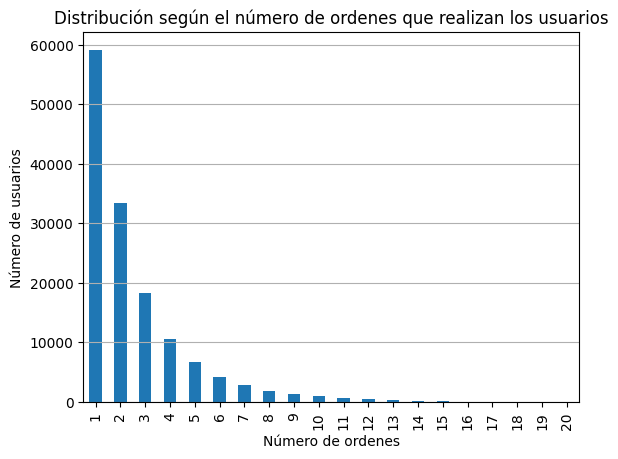

In [ ]:
# Visualización de la distribucion de pedidos por cliente.
df_user_orders = df_sample.groupby('user_id')['order_id'].nunique() # Contando el numero de ordenes por usuario.
df_user_orders = pd.DataFrame(df_user_orders) # Creando un dataframe del resultado
df_user_orders = df_user_orders.groupby('order_id')['order_id'].count() # Contando los usuarios por el numero de ordenes que realizaron.

last_order_plot = df_user_orders.plot(title='Distribución según el número de ordenes que realizan los usuarios',
                                xlabel='Número de ordenes',
                                ylabel='Número de usuarios',
                                kind='bar',
                                ylim=0) # Graficamos el conteo de los valores agrupados en un diagrama de lineas.

plt.grid(axis='y') # Añadimos una cuadricula para hacer la visualización mas sencilla.

plt.show()

Se puede apreciar que la mayor cantidad de usuarios se encuentra en un rango de órdenes entre 1 y 4. A medida que aumenta el número de órdenes, menor es el número de usuarios.

### 3.7. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (identificación y nombre)?

In [75]:
# Top 20 productos más populares.
df_sample_orders = df_orders.sample(int(len(df_orders)*0.75)) # Obtenemos la muestra del 75% de los datos.

# Contamos el numero de ordenes de cada producto.
df_products_order = df_sample_orders.groupby('product_id')['order_id'].count()
df_products_order.sort_values(ascending=False, inplace=True)

#Seleccionamos los 20 mas populares
top_20_products = df_products_order[0:20]

# Organizamos un dataframe de resultados para el top 
top_20_list = []

for i, product in top_20_products.items():
    row = {'product_name': df_products.query('product_id == @i').iloc[0]['product_name'], 'product_id': i, 'number of orders': product}
    top_20_list.append(row)
    
top_20_products = pd.DataFrame(top_20_list, index=range(1,21))
    
print('Top 20 productos mas populares:\n')
print(top_20_products)

Top 20 productos mas populares:

                product_name  product_id  number of orders
1                     banana       24852             49432
2     bag of organic bananas       13176             40129
3       organic strawberries       21137             27935
4       organic baby spinach       21903             25370
5       organic hass avocado       47209             22342
6            organic avocado       47766             18516
7                large lemon       47626             16078
8               strawberries       16797             14981
9         organic whole milk       27845             14702
10                     limes       26209             14679
11       organic raspberries       27966             14402
12      organic yellow onion       22935             11877
13            organic garlic       24964             11473
14          organic zucchini       45007             10863
15       organic blueberries       39275             10368
16            cucumber 

Podemos observar una gran cantidad de productos orgánicos en la lista, por lo que estos tienen gran popularidad en los usuarios, los bananos marcan una fuerte tendencia en las órdenes.

# 3.8. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?

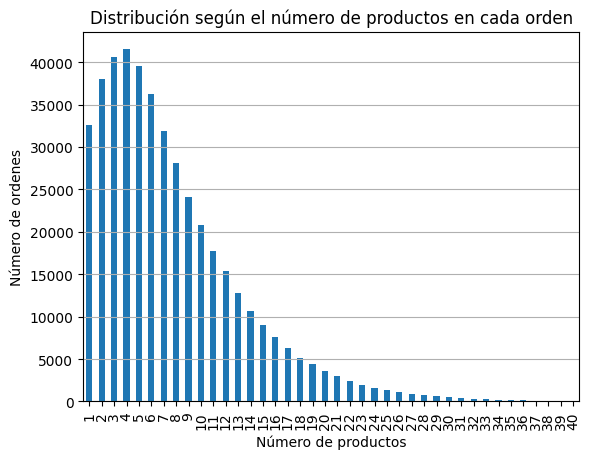

In [ ]:
# Articulos comprados por cada orden.
products_by_orders = df_sample_orders.groupby('order_id')['product_id'].count() # Contando el numero de productos por orden.
df_products_by_orders= pd.DataFrame(products_by_orders) # Creando un dataframe del resultado.
df_products_by_orders = df_products_by_orders.groupby('product_id')['product_id'].count() # Contando las ordenes por el numero de productos que tienen.

# Visualizamos unicamente las ordenes con menos de 40 productos.
products_by_orders_plot = df_products_by_orders[0:40].plot(title='Distribución según el número de productos en cada orden',
                                xlabel='Número de productos',
                                ylabel='Número de ordenes',
                                kind='bar',
                                ylim=0) # Graficamos el conteo de los valores agrupados en un diagrama de lineas.

plt.grid(axis='y') # Añadimos una cuadricula para hacer la visualización mas sencilla.

plt.show()

En este caso visualizamos únicamente las órdenes que tienen hasta 40 productos, ya que contienen la información más relevante y facilitan la visualización del gráfico. Podemos apreciar que la moda para la cantidad de productos por orden es 4, y que, a medida que aumenta el número de productos, menor es la cantidad de órdenes registradas. La mayor cantidad de órdenes se encuentra entre 1 y 10 productos, a partir de 10 productos, la cantidad de órdenes disminuye considerablemente.

### 3.9. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (nombres e IDs de los productos)?

In [77]:
# Top 20 articulos re ordenados con mayor frecuencia.
products_reordered = df_sample_orders[df_sample_orders['reordered'] == 1] # Filtrando por productos que se volvieron a ordenar.

# Contamos el numero de ordenes de cada producto.
df_products_reordered = products_reordered.groupby('product_id')['order_id'].count()
df_products_reordered.sort_values(ascending=False, inplace=True)

#Seleccionamos los 20 mas populares
top_20_products = df_products_reordered[0:20]

# Organizamos un dataframe de resultados para el top 
top_20_list = []

for i, product in top_20_products.items():
    row = {'product_name': df_products.query('product_id == @i').iloc[0]['product_name'], 'product_id': i, 'number of orders': product}
    top_20_list.append(row)
    
top_20_products = pd.DataFrame(top_20_list, index=range(1,21))
    
print('Top 20 productos ordenados nuevamente mas populares:\n')
print(top_20_products)

Top 20 productos ordenados nuevamente mas populares:

                product_name  product_id  number of orders
1                     banana       24852             41783
2     bag of organic bananas       13176             33478
3       organic strawberries       21137             21601
4       organic baby spinach       21903             19606
5       organic hass avocado       47209             17762
6            organic avocado       47766             14042
7         organic whole milk       27845             12147
8                large lemon       47626             11317
9        organic raspberries       27966             11054
10              strawberries       16797             10453
11                     limes       26209              9908
12      organic yellow onion       22935              8334
13            organic garlic       24964              7782
14          organic zucchini       45007              7497
15            cucumber kirby       49683              7194
16

Nuevamente, los productos orgánicos son los más populares en la lista, siendo las bananas quienes encabezan la lista de productos que se vuelven a ordenar con más frecuencia.

### 3.10. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos)?

In [78]:
# Proporción de veces que se vuelve a ordenar cada producto.

# Creando los dos dataframes para unirlos.
df_products_order = pd.DataFrame(df_products_order)
df_products_reordered = pd.DataFrame(df_products_reordered)

# Uniendo y llenando los valores nulos
df_products_ratio = df_products_order.merge(df_products_reordered, how='left', on='product_id', suffixes=['', '_reorder'])
df_products_ratio['order_id_reorder'].fillna(0, inplace=True)

# Creando una columna para visualizar el ratio y ordenarlo de mayor a menor.
df_products_ratio['reorder_ratio'] = df_products_ratio['order_id_reorder'] / df_products_ratio['order_id']
df_products_ratio.sort_values('reorder_ratio', ascending=False)

,order_id,order_id_reorder,reorder_ratio
product_id,,,
37955,4,4.0,1.0
48992,2,2.0,1.0
2560,1,1.0,1.0
39474,2,2.0,1.0
40006,1,1.0,1.0
...,...,...,...
29652,2,0.0,0.0
24305,2,0.0,0.0
34239,2,0.0,0.0


In [79]:
# Explorando la proporcion de re ordenamiento de un producto para el top 20 de productos.
top_20_products = top_20_products.merge(df_products_ratio[['reorder_ratio']], how='left', left_on='product_id', right_index=True)
top_20_products

,product_name,product_id,number of orders,reorder_ratio
1,banana,24852,41783,0.845262
2,bag of organic bananas,13176,33478,0.834260
3,organic strawberries,21137,21601,0.773259
4,organic baby spinach,21903,19606,0.772803
5,organic hass avocado,47209,17762,0.795005
6,organic avocado,47766,14042,0.758371
7,organic whole milk,27845,12147,0.826214
8,large lemon,47626,11317,0.703881
9,organic raspberries,27966,11054,0.767532
10,strawberries,16797,10453,0.697750


Podemos observar que el top de productos tiene una proporción de reordenamiento muy buena y esto tiene sentido, ya que muchos de los productos en este top también aparecen en el top de productos que más veces se vuelven a ordenar.

### 3.11. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido?

In [80]:
# Proporción de productos que se pidieron de nuevo por cada cliente.
# Creando el dataframe de productos por usuarios.
df_sample_orders_users = df_sample_orders.merge(df_instacart[['order_id','user_id']], how='left', on='order_id')
products_users = df_sample_orders_users.groupby('user_id')['product_id'].count()
df_products_users = pd.DataFrame(products_users)

# Creando el dataframe de productos por usuarios con productos que se volvieron a ordenar.
df_sample_reorders_users = df_sample_orders_users[df_sample_orders_users['reordered'] == 1]
products_users_reorder = df_sample_reorders_users.groupby('user_id')['product_id'].count()
df_products_users_reorder = pd.DataFrame(products_users_reorder)

# Juntando ambos dataframes para encontrar la proporcion
client_ratio = df_products_users.merge(df_products_users_reorder, how='left', left_index=True, right_index=True)
client_ratio.columns = ['total_products', 'products_reordered']
client_ratio['products_reordered'].fillna(0, inplace=True)
client_ratio['reorder_ratio'] = client_ratio['products_reordered'] / client_ratio['total_products']
client_ratio

,total_products,products_reordered,reorder_ratio
user_id,,,
2,21,0.0,0.000000
4,1,0.0,0.000000
5,9,6.0,0.666667
6,4,0.0,0.000000
7,11,10.0,0.909091
...,...,...,...
206203,20,5.0,0.250000
206206,17,12.0,0.705882
206207,31,26.0,0.838710


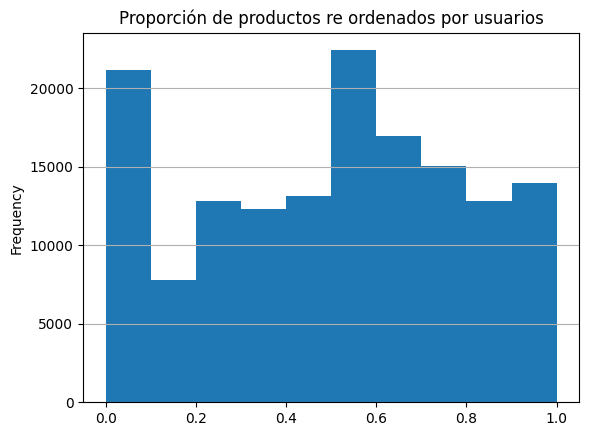

In [81]:
# Visualizamos
products_by_orders_plot = client_ratio['reorder_ratio'].plot(title='Proporción de productos re ordenados por usuarios',
                                xlabel='Proporcion de productos que se volvieron a ordenar',
                                ylabel='Número de usuarios',
                                kind='hist',
                                ylim=0) # Graficamos el conteo de los valores agrupados en un histograma.

plt.grid(axis='y') # Añadimos una cuadricula para hacer la visualización mas sencilla.

plt.show()

Podemos concluir que una gran cantidad de usuarios vuelve a ordenar los mismos productos, en donde de sus órdenes la mayor cantidad de usuarios frecuenta reordenar entre el 50% y el 60% de sus productos. Sin embargo, también hay un grupo de usuarios que no reordenan ningún producto o reordenan muy poco (entre 0% y 10%), lo que nos indica que hay un grupo marcado de usuarios que no repite sus órdenes.

### 3.12. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [82]:
# Top 20 articulos puestos de primeras en el carrito.
# Filtro por todos los articulos incluidos de primeras al carrito.
df_first_add = df_sample_orders[df_sample_orders['add_to_cart_order'] == 1]

# Se agrupa por cada producto y se organizan de mayor a menor.
first_add_product = df_first_add.groupby('product_id')['product_id'].count()
first_add_product.sort_values(ascending=False, inplace=True)

#Seleccionamos los 20 mas populares
top_20_products_fisrt_added = first_add_product[0:20]

# Organizamos un dataframe de resultados para el top 
top_20_list = []

for i, product in top_20_products_fisrt_added.items():
    row = {'product_name': df_products.query('product_id == @i').iloc[0]['product_name'], 'product_id': i, 'times': product}
    top_20_list.append(row)
    
top_20_products = pd.DataFrame(top_20_list, index=range(1,21))
    
print('Top 20 productos puestos en el carrito de primeras:\n')
print(top_20_products)

Top 20 productos puestos en el carrito de primeras:

                   product_name  product_id  times
1                        banana       24852  11700
2        bag of organic bananas       13176   8245
3            organic whole milk       27845   3228
4          organic strawberries       21137   2954
5          organic hass avocado       47209   2486
6          organic baby spinach       21903   2478
7               organic avocado       47766   2275
8                  spring water       19660   1783
9                  strawberries       16797   1730
10          organic raspberries       27966   1539
11   sparkling water grapefruit       44632   1417
12          organic half & half       49235   1379
13                  large lemon       47626   1286
14                         soda         196   1280
15     organic reduced fat milk       38689   1072
16                        limes       26209   1016
17  organic reduced fat 2% milk        5785   1006
18                hass avocad

Nuevamente tenemos a las bananas liderando este top y a los productos orgánicos ocupando múltiples puestos en este análisis.

# Conclusiones <a id='end'></a>

Al organizar y limpiar los datos de cada una de las tablas proporcionadas, logramos establecer algunos patrones en las órdenes y los usuarios del negocio.


- La visualización de horas más concurridas de órdenes nos muestra cómo a partir de las 7 de la mañana se disparan los pedidos, alcanzan un máximo entre las 10 am y las 4 pm y a partir de esa hora inician a descender paulatinamente. Además, los domingos son los días con más órdenes.

- Podemos concluir que un gran grupo de clientes espera de entre 1 a 8 días para realizar su próximo pedido.

- Los productos más populares entre los usuarios suelen ser los productos orgánicos, especialmente las frutas y las leches.